# Analysing and Visualising

In [1]:
# Importing the required modules

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Reading the data 

df = pd.read_csv("survey_results_public.csv")


# Set the cloumns and row display size
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows', 15)

In [3]:
df.head(15)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [4]:
# Advanced filterring

sal_low = input('Enter the min Salery: ')
lang_cho = input('Enter the language choise: ')


filt = ((df['ConvertedComp'] >= 100000) & (df['LanguageWorkedWith'].str.contains('Java',na =False))) 

df.loc[filt,['ConvertedComp','LanguageWorkedWith']]

Enter the min Salery: 1230
Enter the language choise: C


,ConvertedComp,LanguageWorkedWith
15,108576.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
40,106000.0,C;C#;Java;SQL
41,130000.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...
42,135000.0,Dart;HTML/CSS;Java;JavaScript;SQL
47,125000.0,JavaScript;Ruby;SQL
...,...,...
63902,125000.0,Bash/Shell/PowerShell;C#;Go;Haskell;HTML/CSS;J...
63998,100000.0,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...
64005,260000.0,HTML/CSS;Java;JavaScript;Python;SQL
64035,2000000.0,C#;HTML/CSS;JavaScript;Perl;Python;SQL;TypeScript


In [5]:
to_plot = df.loc[filt,'OpSys'].value_counts()
to_plot

MacOS          2673
Windows        2223
Linux-based    1306
BSD               2
Name: OpSys, dtype: int64

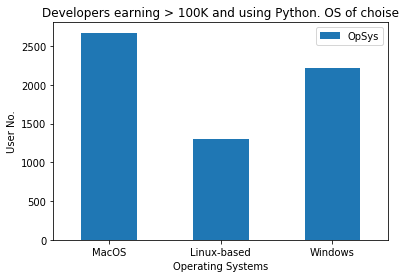

In [6]:
# Plotting a bar graph



index = ['MacOS','Linux-based', 'Windows'] 
df_plt = pd.DataFrame(to_plot, index=index)
ax = df_plt.plot.bar(rot=0)

# labelling
plt.title("Developers earning > 100K and using Python. OS of choise")
plt.xlabel("Operating Systems")
plt.ylabel("User No.")

plt.show()

Enter the min Salery: 100000
Enter the language choise: C
Enter the language choise: Java


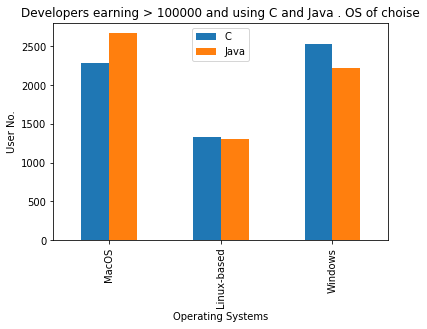

In [7]:


# Advanced filterring


def sal_lang_plot(sal_low,lang_cho1,lang_cho2):
    filt1 = ((df['ConvertedComp'] >= sal_low) & (df['LanguageWorkedWith'].str.contains(lang_cho1,na =False)))
    filt2 = ((df['ConvertedComp'] >= sal_low) & (df['LanguageWorkedWith'].str.contains(lang_cho2,na =False)))

    # df.loc[filt,['ConvertedComp','LanguageWorkedWith']]

    # Get the plot values ready
    to_plot1 = df.loc[filt1,'OpSys'].value_counts()
    to_plot2 = df.loc[filt2,'OpSys'].value_counts()

    # Plotting a bar graph



    index = ['MacOS','Linux-based', 'Windows'] 
    df_plt = pd.DataFrame({'to_plot1': to_plot1,
                   'to_plot2': to_plot2}, index=index)
    ax = df_plt.plot.bar()

    # labelling
    plt.title(f"Developers earning > {sal_low} and using {lang_cho1} and {lang_cho2} OS of choice")
    plt.xlabel("Operating Systems")
    plt.ylabel("User No.")
    plt.legend([lang_cho1,lang_cho2])

    plt.show()
    


# User Input

sal_low = int(input('Enter the min Salery: '))
lang_cho1 = input('Enter the language choice: ')
lang_cho2 = input('Enter the language choice: ')
sal_lang_plot(sal_low,lang_cho1,lang_cho2)

